In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree



In [ ]:
df = pd.read_csv("network_traffic_features.csv")

df = df.sample(frac=1, random_state=308).reset_index(drop=True)

label_encoder = LabelEncoder()
df['dataset'] = label_encoder.fit_transform(df['dataset'])

X = df.drop(columns=['dataset'])
y = df['dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=308, stratify=y)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=308)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/Users/nishk/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nishk/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nishk/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nishk/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed)

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

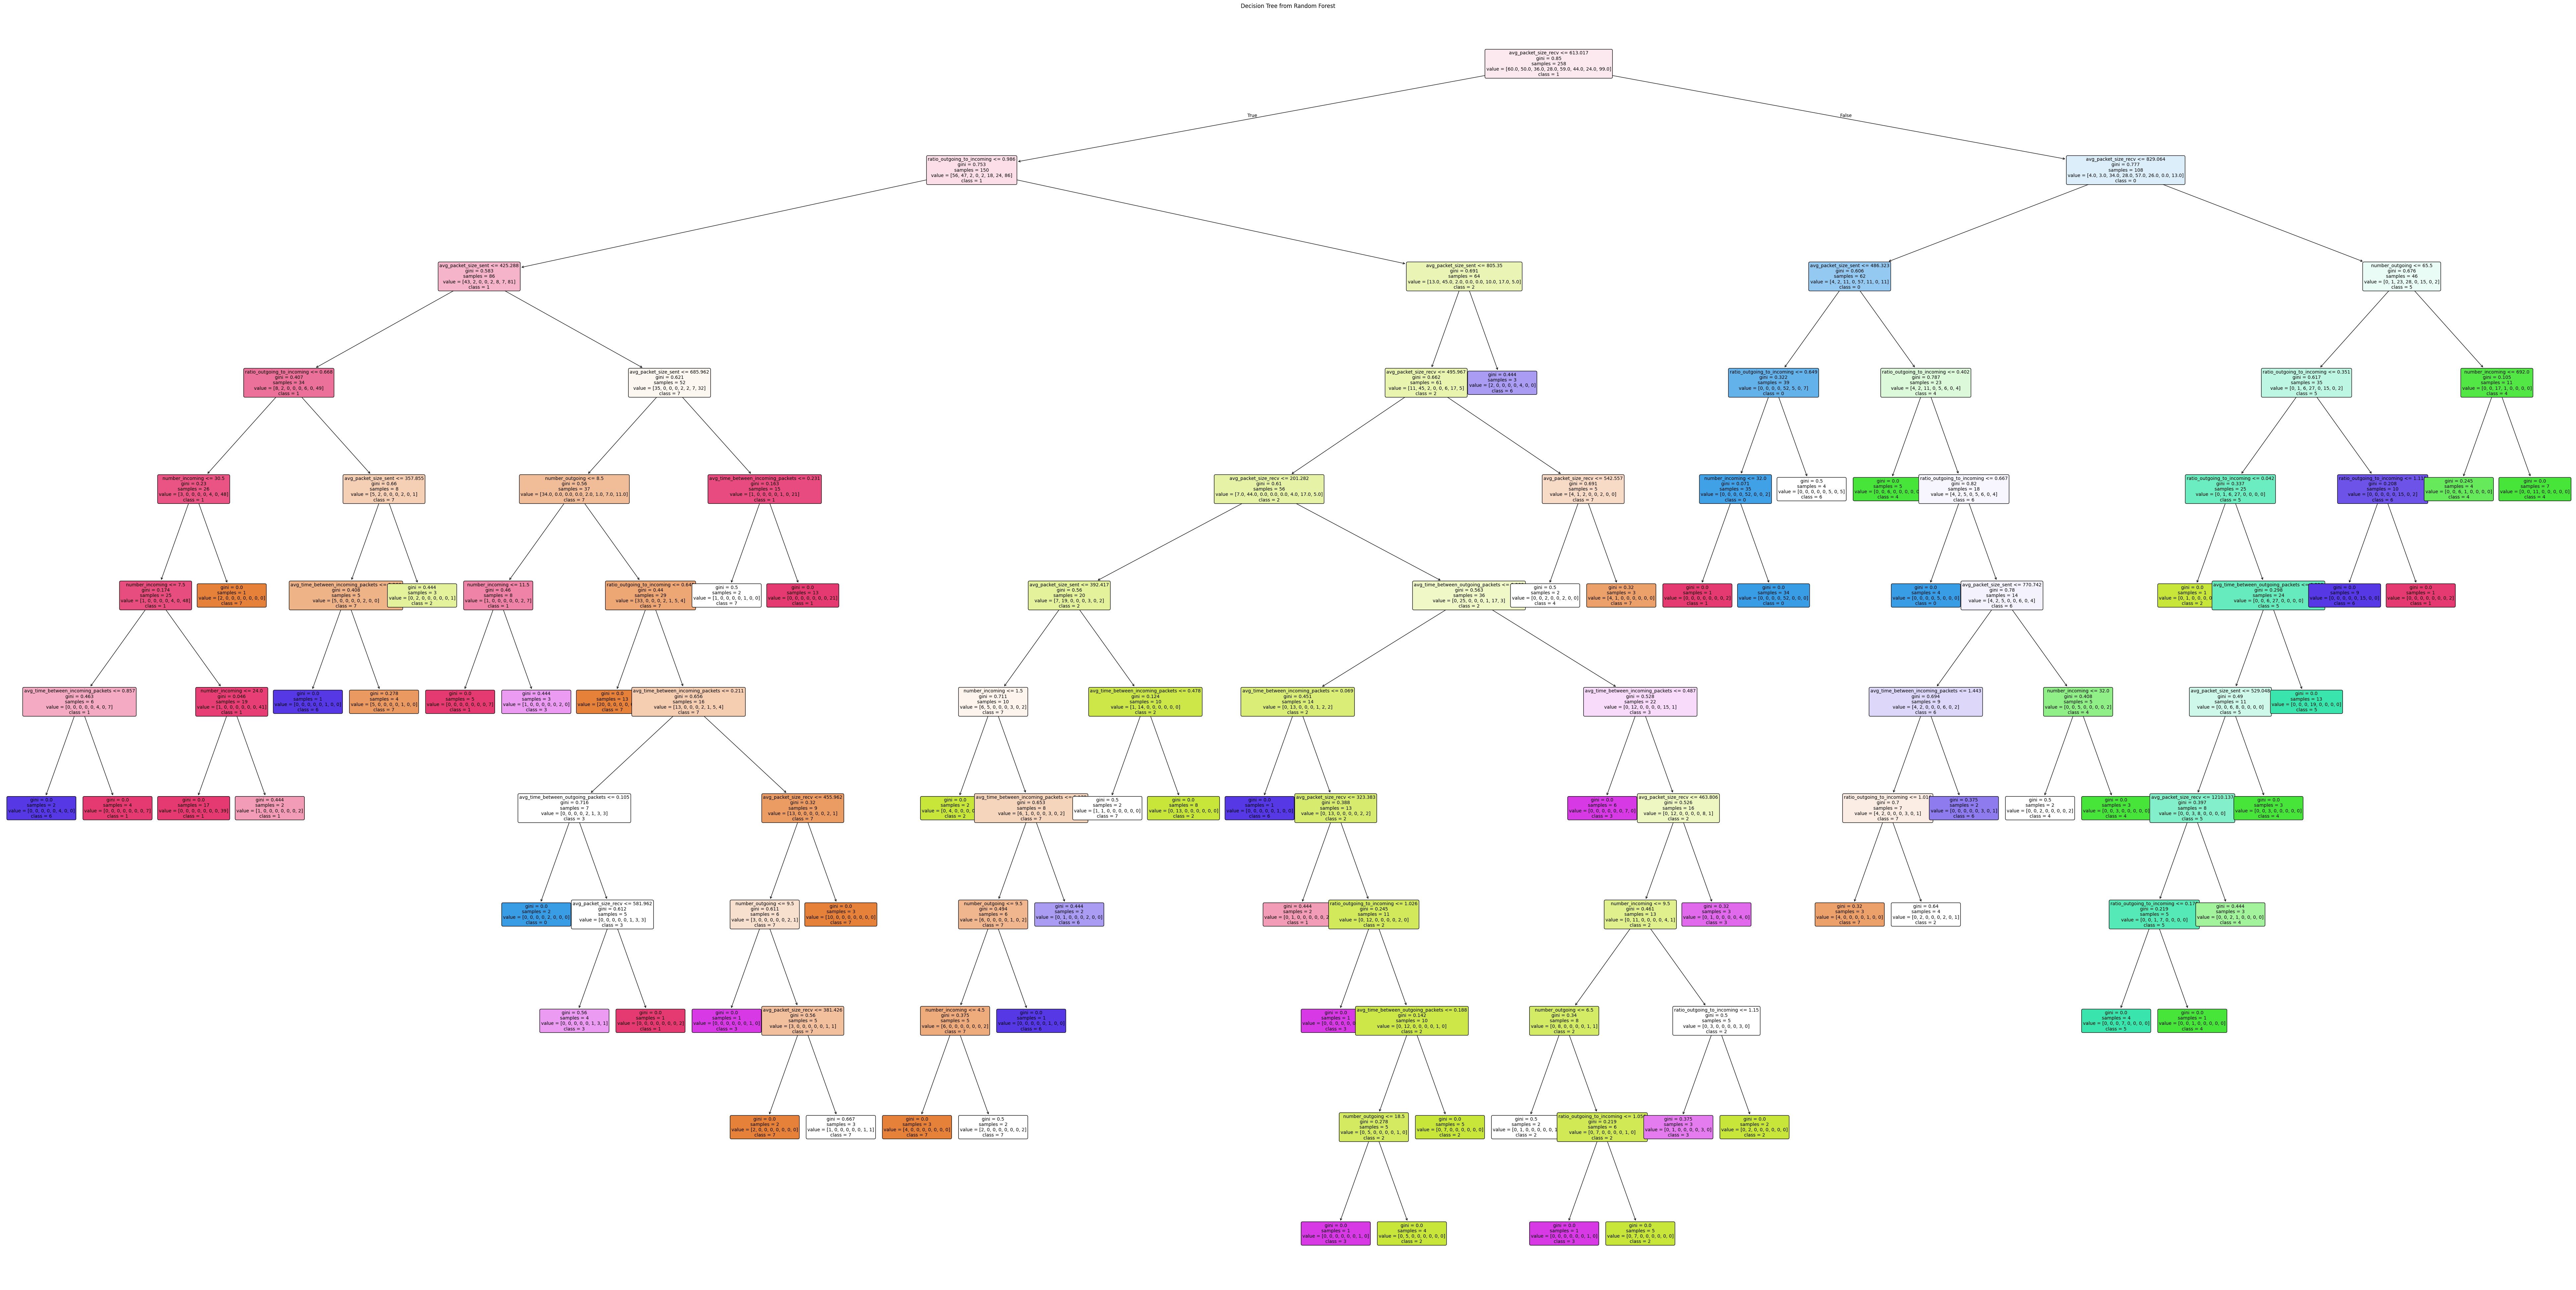

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
X = df.drop(columns=["dataset"])
y = df["dataset"]

feature_names = X.columns.tolist()
class_names = y.unique().astype(str).tolist()
plt.figure(figsize=(100, 50))
plot_tree(best_rf.estimators_[0],
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

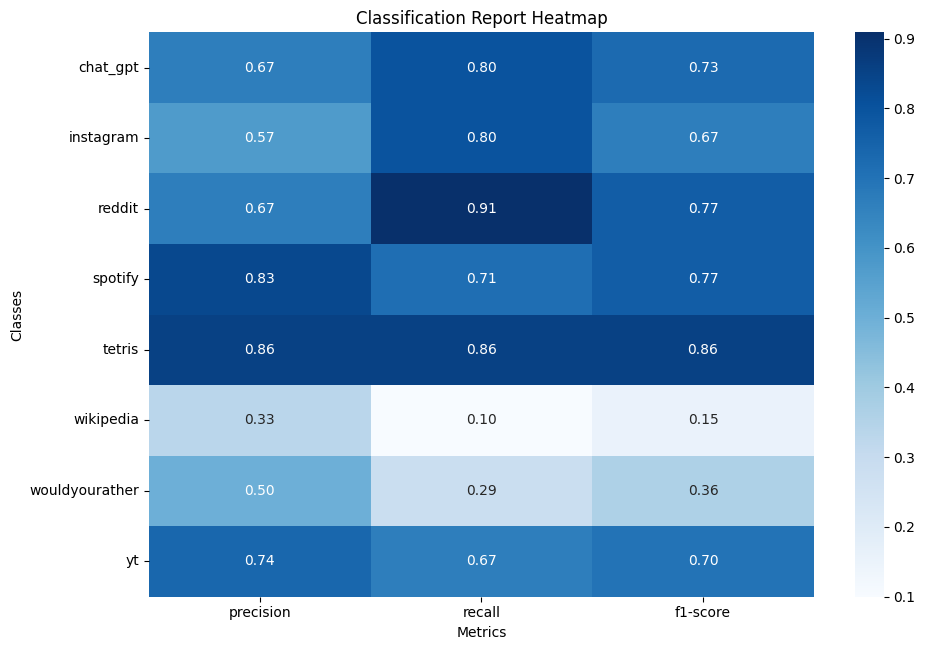

In [ ]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df = report_df.drop(columns=['support'])

plt.figure(figsize=(10, len(report_df) * 0.6))
sns.heatmap(report_df.iloc[:-3], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("network_traffic_features.csv")

df = df.sample(frac=1, random_state=308).reset_index(drop=True)

label_encoder = LabelEncoder()
df['dataset'] = label_encoder.fit_transform(df['dataset'])

X = df.drop(columns=['dataset'])
y = df['dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=308, stratify=y)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.56
Classification Report:
                 precision    recall  f1-score   support

      chat_gpt       0.36      0.60      0.45        15
     instagram       0.48      0.73      0.58        15
        reddit       0.62      0.91      0.74        11
       spotify       0.67      0.29      0.40         7
        tetris       0.93      0.93      0.93        14
     wikipedia       0.60      0.30      0.40        10
wouldyourather       0.25      0.14      0.18         7
            yt       0.70      0.33      0.45        21

      accuracy                           0.56       100
     macro avg       0.58      0.53      0.52       100
  weighted avg       0.60      0.56      0.54       100



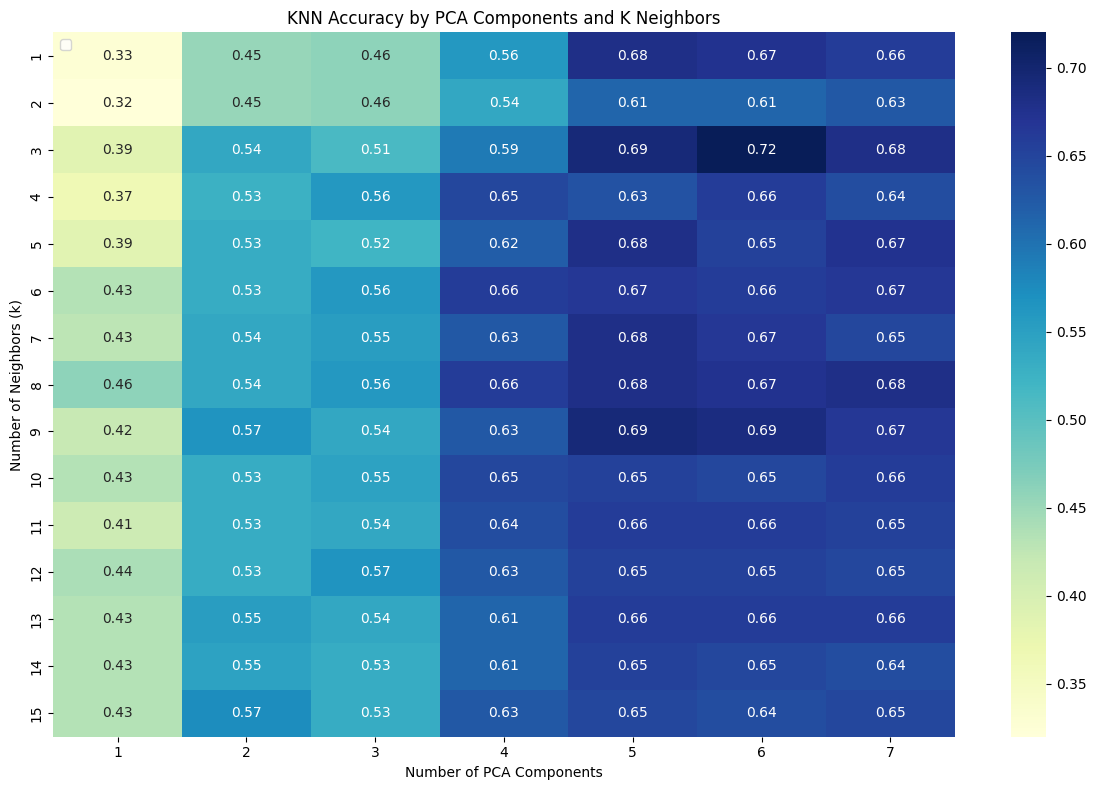

/var/folders/cy/zk4z3gfd61j8bl6zhmcvx7yw0000gn/T/ipykernel_45771/3086789874.py:81: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interpolate.interp2d(X_mesh, Y_mesh, Z_mesh, kind='cubic')
/Users/nishk/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:286: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=13,16 m=105 fp=0.004316 s=0.000000
  self.tck = _f

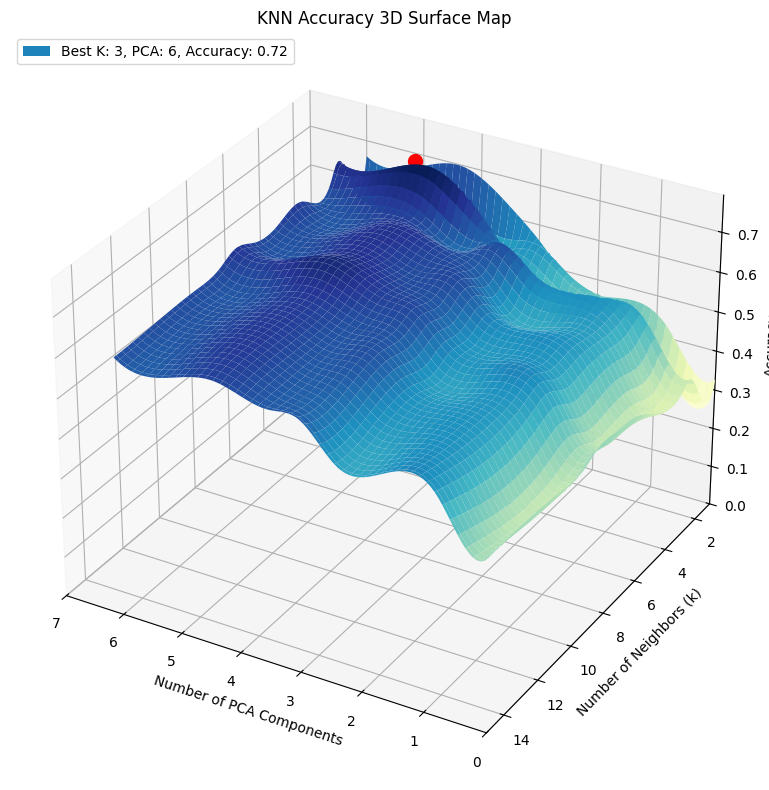

In [ ]:
X = df.drop('dataset', axis=1)
y = pd.Categorical(df['dataset']).codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

max_pcs = min(15, X.shape[1])
k_values = range(1, 16)
results = np.zeros((len(k_values), max_pcs))

for i, k in enumerate(k_values):
    for j in range(1, max_pcs + 1):
        pca = PCA(n_components=j)
        X_pca = pca.fit_transform(X_scaled)

        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        results[i, j - 1] = acc

best_accuracy = np.max(results)
best_pca, best_k = np.unravel_index(np.argmax(results), results.shape)

plt.figure(figsize=(12, 8))
sns.heatmap(results, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=range(1, max_pcs + 1),
            yticklabels=k_values)

plt.title("KNN Accuracy by PCA Components and K Neighbors")
plt.xlabel("Number of PCA Components")
plt.ylabel("Number of Neighbors (k)")
plt.tight_layout()

plt.legend([f"Best Accuracy: {best_accuracy:.2f} at PC={best_pca + 1}, k={best_k + 1}"], loc='upper left')

plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X_mesh, Y_mesh = np.meshgrid(range(0, max_pcs), k_values)
Z_mesh = results

x = np.linspace(X_mesh.min(), X_mesh.max(), 100)
y = np.linspace(Y_mesh.min(), Y_mesh.max(), 100)
X_smooth, Y_smooth = np.meshgrid(x, y)

interpolator = interpolate.interp2d(X_mesh, Y_mesh, Z_mesh, kind='cubic')
Z_smooth = interpolator(x, y)

ax.plot_surface(X_smooth, Y_smooth, Z_smooth, cmap='YlGnBu', edgecolor='none')

ax.set_title("KNN Accuracy 3D Surface Map")
ax.set_xlabel("Number of PCA Components")
ax.set_ylabel("Number of Neighbors (k)")
ax.set_zlabel("Accuracy")
ax.view_init(30, 120)

ax.scatter(best_k + 1, best_pca-4, best_accuracy-0.17, color='red', s=100, label=f"Best Accuracy: {best_accuracy:.2f}")
ax.legend([f"Best K: {best_pca + 1}, PCA: {best_k + 1}, Accuracy: {best_accuracy:.2f}"], loc='upper left')

ax.set_xlim([0, max_pcs])
ax.set_ylim([min(k_values), max(k_values)])
ax.set_zlim([0, np.max(Z_mesh) * 1.1])

plt.tight_layout()
plt.show()
